# Chapter 1: Singular Value Decomposition (SVD)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from platform import python_version
python_version()

'3.7.5'

In [3]:
plot_dir = 'plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)
plot_id = 0

In [4]:
x = np.array(range(9)).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
u, s, v = np.linalg.svd(x)
u.shape, s.shape, v.shape

((3, 3), (3,), (3, 3))

In [6]:
def truncated_from_svd(u, s, v, r):
    
    return np.dot(u[:, :r] * s[:r], v[:r, :])

In [7]:
r = x.shape[1]  # Full SVD
assert np.allclose(x, truncated_from_svd(u, s, v, r))

In [8]:
r = 2
x_approx = truncated_from_svd(u, s, v, r)
x_approx.round(3)

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [9]:
def two_2d_plots(axes, plot_info, axes_off=True):
    for ax, (title, data) in zip(axes, plot_info.items()):
        ax.imshow(data)
        ax.set_title(title)
        if axes_off:
            ax.axis('off')

def save_plot():
    global plot_id
    filename = f'svd-example-{plot_id:2d}.png'
    filepath = os.path.join(plot_dir, filename)
    plt.savefig(filepath)
    plot_id += 1


  r  MSE  
  1 0.000044
  2 0.000000
  3 0.000000


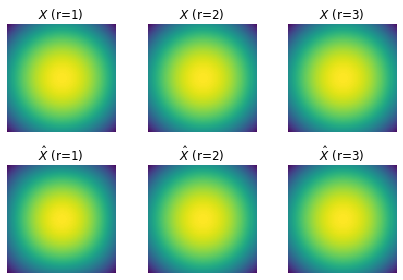

In [10]:
def f(x, y):
    return 1.0 - (x - 0.5)**2 - (y - 0.5)**2

# Prepare data (x)
n = 100
shape = (n, n)
x = np.fromfunction(lambda i, j: f(i/shape[1], j/shape[0]), shape)

u, s, v = np.linalg.svd(x)

fig, axes = plt.subplots(2, 3)

print("  r  MSE  ")
for i, r in enumerate([1, 2, 3]):
    x_approx = truncated_from_svd(u, s, v, r)
    plot_info = {
        '$X$ (r=%d)' % r: x,
        '$\hat{X}$ (r=%d)' % r: x_approx
    }
    two_2d_plots(axes[:, i], plot_info)
    mse = ((x - x_approx)**2).mean()
    print(f"{r:3d} {mse:.6f}")

plt.tight_layout()
save_plot()
plt.show()

  r  MSE  
  1 0.004976
  2 0.000000
  3 0.000000


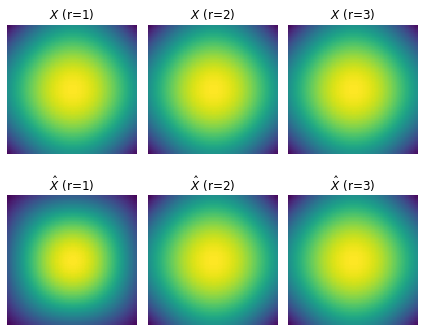

In [11]:
def f(x, y):
    return np.sin(np.pi*x) + np.sin(np.pi*y)

# Prepare data (x)
n = 100
shape = (n, n)
x = np.fromfunction(lambda i, j: f(i/shape[1], j/shape[0]), shape)

u, s, v = np.linalg.svd(x)

r_values = [1, 2, 3]
n_r = len(r_values)
fig, axes = plt.subplots(2, n_r, figsize=(2*n_r, 5))

print("  r  MSE  ")
for i, r in enumerate(r_values):
    x_approx = truncated_from_svd(u, s, v, r)
    plot_info = {
        '$X$ (r=%d)' % r: x,
        '$\hat{X}$ (r=%d)' % r: x_approx
    }
    two_2d_plots(axes[:, i], plot_info)
    mse = ((x - x_approx)**2).mean()
    print(f"{r:3d} {mse:.6f}")

plt.tight_layout()
save_plot()
plt.show()

  r  MSE  
  1 0.062500
  2 0.000000
  3 0.000000


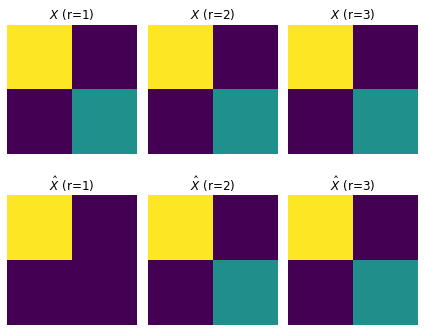

In [12]:
# Prepare data (x)
n = 100
shape = (n, n)
x = np.zeros(shape)
x[0:n//2, 0:n//2] = 1.0
x[n//2:, n//2:] = 0.5

u, s, v = np.linalg.svd(x)

r_values = [1, 2, 3]
n_r = len(r_values)
fig, axes = plt.subplots(2, n_r, figsize=(2*n_r, 5))

print("  r  MSE  ")
for i, r in enumerate(r_values):
    x_approx = truncated_from_svd(u, s, v, r)
    plot_info = {
        '$X$ (r=%d)' % r: x,
        '$\hat{X}$ (r=%d)' % r: x_approx
    }
    two_2d_plots(axes[:, i], plot_info)
    mse = ((x - x_approx)**2).mean()
    print(f"{r:3d} {mse:.6f}")

plt.tight_layout()
save_plot()
plt.show()

  r  MSE  
  1 0.500000
  2 0.000000
  3 0.000000


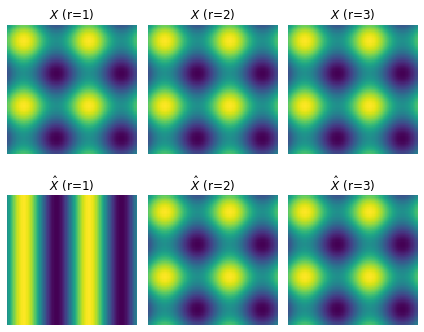

In [13]:
def f(x, y):
    return np.sin(np.pi*x*4) + np.sin(np.pi*y*4)

# Prepare data (x)
n = 100
shape = (n, n)
x = np.fromfunction(lambda i, j: f(i/shape[1], j/shape[0]), shape)

u, s, v = np.linalg.svd(x)

r_values = [1, 2, 3]
n_r = len(r_values)
fig, axes = plt.subplots(2, n_r, figsize=(2*n_r, 5))

print("  r  MSE  ")
for i, r in enumerate(r_values):
    x_approx = truncated_from_svd(u, s, v, r)
    plot_info = {
        '$X$ (r=%d)' % r: x,
        '$\hat{X}$ (r=%d)' % r: x_approx
    }
    two_2d_plots(axes[:, i], plot_info)
    mse = ((x - x_approx)**2).mean()
    print(f"{r:3d} {mse:.6f}")

plt.tight_layout()
save_plot()
plt.show()

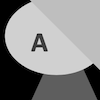

In [14]:
from PIL import Image

# Load a colour image
im = Image.open('image.png')
assert np.array(im).shape == (100, 100, 4)

# Just select one colour channel
shapes_array = np.array(im)[:, :, 0]
assert shapes_array.shape == (100, 100)

# Save image data to file
np.savetxt('shapes_data.csv', shapes_array, delimiter=',', fmt='%d')

Image.fromarray(np.uint8(shapes_array))

  r  MSE  
  2 0.023580
  5 0.009988
 10 0.003580
 20 0.001108
 50 0.000019


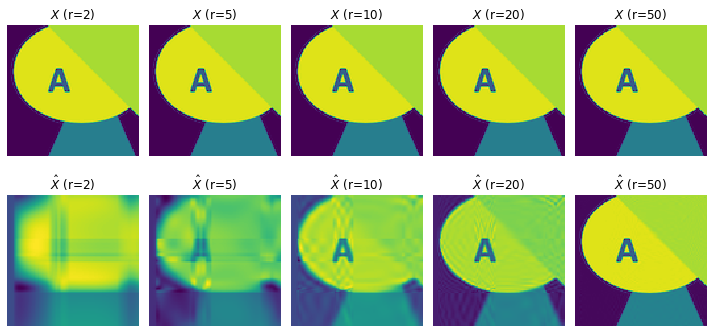

In [15]:
# Load data from file
x = np.loadtxt('shapes_data.csv', delimiter=',', dtype=int)
assert x.shape == (100, 100)

# Standardize to 0 - 1
x = (x - x.min())/(x.max() - x.min())

u, s, v = np.linalg.svd(x)

r_values = [2, 5, 10, 20, 50]
n_r = len(r_values)
fig, axes = plt.subplots(2, n_r, figsize=(2*n_r, 5))

print("  r  MSE  ")
for i, r in enumerate(r_values):
    x_approx = truncated_from_svd(u, s, v, r)
    plot_info = {
        '$X$ (r=%d)' % r: x,
        '$\hat{X}$ (r=%d)' % r: x_approx
    }
    two_2d_plots(axes[:, i], plot_info)
    mse = ((x - x_approx)**2).mean()
    print(f"{r:3d} {mse:.6f}")

plt.tight_layout()
save_plot()
plt.show()

  r  MSE  
  2 0.018601
  5 0.012185
 10 0.008153
 20 0.004329
 50 0.000362


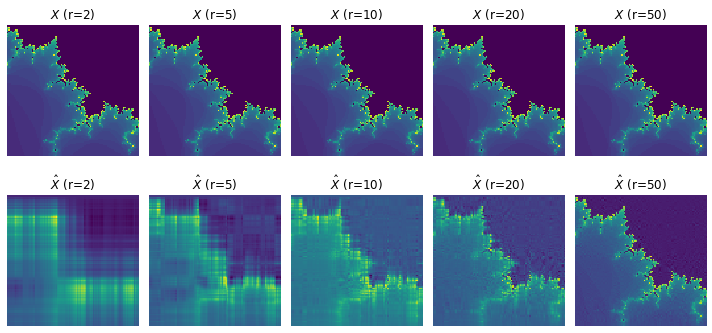

In [16]:
def mandelbrot(x, y, rect=(-1.6, -1.2, 2.4, 2.4), n=50):
    c0 = complex(rect[0] + rect[2]*x, 
                 rect[1] + rect[3]*y) 
    c = 0
    for i in range(1, n): 
        if abs(c) > 2: 
            return i
        c = c * c + c0 
    return 0

# Prepare data (x)
n = 100
shape = (n, n)
rect = (-1.4, -0.4, 0.4, 0.4)  # Co-ordinates
for i in range(shape[0]): 
    for j in range(shape[1]): 
        x[i, j] = mandelbrot(j / shape[1], 
                             1 - i / shape[0],
                             rect=rect)
# Standardize to 0 - 1
x = (x - x.min())/(x.max() - x.min())
 
u, s, v = np.linalg.svd(x)

r_values = [2, 5, 10, 20, 50]
n_r = len(r_values)
fig, axes = plt.subplots(2, n_r, figsize=(2*n_r, 5))

print("  r  MSE  ")
for i, r in enumerate(r_values):
    x_approx = truncated_from_svd(u, s, v, r)
    plot_info = {
        '$X$ (r=%d)' % r: x,
        '$\hat{X}$ (r=%d)' % r: x_approx
    }
    two_2d_plots(axes[:, i], plot_info)
    mse = ((x - x_approx)**2).mean()
    print(f"{r:3d} {mse:.6f}")

plt.tight_layout()
save_plot()
plt.show()